In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
from scipy.optimize import curve_fit
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/"
rm_inpath = '/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/redmapper/full_pmem/cosmoDC2_v1.1.4_redmapper_v0.8.1/'

In [3]:
am_path = inpath+'AMICO/amico_cats/amico_map_associations_flxzb_mag/Catalog.fits'
rm_path = rm_inpath + 'Catalog.fits'

In [4]:
am = Table.read(am_path)
rm = Table.read(rm_path)

In [5]:
bins = np.linspace(0,50,50)

In [10]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/'

In [11]:
c1 = ClCatalog.read(path+'c1_p.fits', 'c1', full = True)
c2 = ClCatalog.read(path+'c2_p.fits', 'c2', full = True)

In [12]:
matching_folder = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/'

In [13]:
#output_matched_catalog(matching_folder+'c1_p.fits', matching_folder+'c2_p.fits',matching_folder+'output_catalog_' + 'p' +'.fits', c1, c2, matching_type='cross', overwrite=True)
c_merged_12 = ClCatalog.read(matching_folder+'output_catalog_' + 'p' + '.fits', 'merged',  full=True)

/sps/lsst/users/namourou/conda_clone_210223/descv1.1/clevar/clevar/catalog.py:280: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [14]:
def f(x,a,b):
    return a*x+b

In [15]:
par, cov = curve_fit(f, c_merged_12['cat1_mass'], c_merged_12['cat2_mass'])

In [16]:
par

array([ 0.52250914, -2.54862998])

In [17]:
cov

array([[ 4.74047348e-06, -1.29056525e-04],
       [-1.29056525e-04,  4.96911855e-03]])

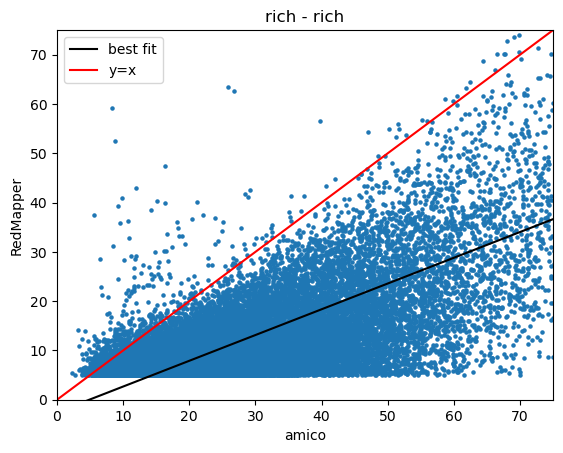

In [18]:
#faire un fit
plt.scatter(c_merged_12['cat1_mass'], c_merged_12['cat2_mass'], s=5)
plt.plot(np.linspace(0,90), f(np.linspace(0,90),par[0],par[1]), color = 'black', label = 'best fit')
plt.plot(np.linspace(0,90), f(np.linspace(0,90),1,0), color = 'red', label = 'y=x')
plt.xlim([0,75])
plt.ylim([0,75])
plt.title('rich - rich')
plt.xlabel('amico')
plt.ylabel('RedMapper')
plt.legend()

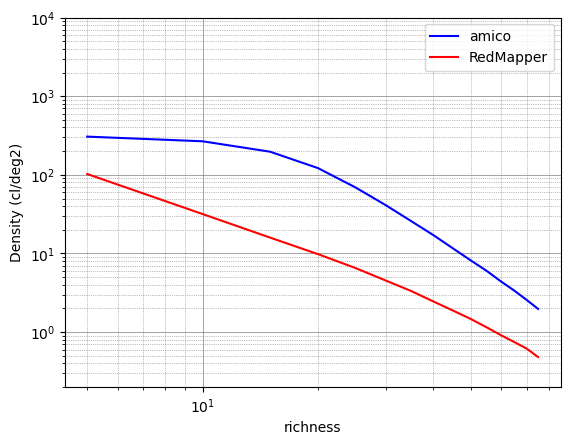

In [19]:
sky_area_sq_deg = 439.78986
rich_bins = np.linspace(5, 75, 15)
#rich_binsb = np.linspace(0, 75, 15)
cdf1 = np.searchsorted(c1["mass"], rich_bins, sorter=c1["mass"].argsort())
cdf1 = len(c1)-cdf1
#cdf1b = np.searchsorted(c1["mass"], rich_bins*par[0]+par[1], sorter=c1["mass"].argsort())
#cdf1b = len(c1)-cdf1b
cdf2 = np.searchsorted(c2["mass"], rich_bins, sorter=c2["mass"].argsort())
cdf2 = len(c2)-cdf2
g1, = plt.semilogy(rich_bins, cdf1 / sky_area_sq_deg, color = 'blue', label = 'amico')
#g1b, = plt.semilogy(rich_bins*par[0]+par[1], cdf1b / sky_area_sq_deg, color = 'blue', label = 'amico_rescaled', linestyle = '--')
g2, = plt.semilogy(rich_bins, cdf2 / sky_area_sq_deg, color = 'red', label = 'RedMapper')
plt.xlabel("richness");
plt.ylabel("Density (cl/deg2)");
plt.legend()
plt.xscale('log')
plt.ylim([0.2,10000])
plt.grid(which='major', axis='both', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', axis='both', linestyle=':', linewidth='0.5', color='grey')

Text(0, 0.5, '$Density_{RM}/Density_{AM}$')

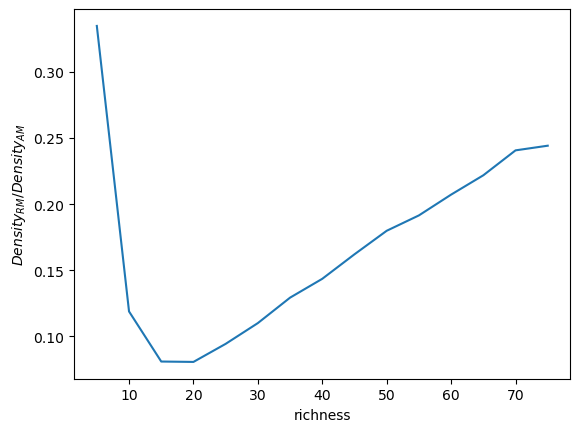

In [20]:
plt.plot(rich_bins, cdf2/cdf1)
plt.xlabel('richness')
plt.ylabel('$Density_{RM}/Density_{AM}$')